In [55]:

#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

%matplotlib inline
     

In [56]:
#@READING THE DATASET
df=pd.read_csv("bank-full.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [57]:
#@UNDERSTANDING THE DATASET:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
#@SELECTING THE RELEVANT COLUMNS:
select_columns=['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

In [60]:
df=df[select_columns]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [61]:
#@ CREATING THE TARGET VARIABLE:
df.y=(df.y=='yes').astype(int)
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [62]:
#@ INITIALIZING NUMERICAL AND CATEGORICAL VARIABLES:
num=['age','balance','day','duration','campaign','pdays','previous']
cat=['job','marital','education','housing','contact','month','poutcome']

In [63]:

#@ SPLITTING THE DATASET:
df_full_train,df_test=train_test_split(df,test_size=0.20,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
y_train=df_train.y.values
y_test=df_test.y.values
y_val=df_val.y.values
del df_train['y']
del df_test['y']
del df_val['y']

In [64]:
#@ CALCULATING ROC AUC SCORE:
for c in num:
    auc=roc_auc_score(y_train,df_train[c])
    if auc < 0.5:
        auc=roc_auc_score(y_train,-df_train[c])
    print(f'{c:9s},{auc:.3f}')    
    

age      ,0.512
balance  ,0.589
day      ,0.526
duration ,0.815
campaign ,0.571
pdays    ,0.590
previous ,0.599


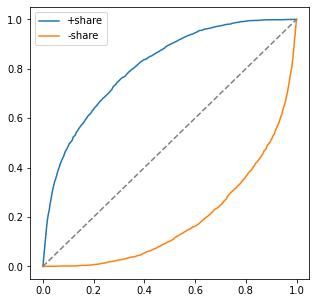

In [83]:

#@ PLOTTING THE ROC CURVE:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.duration)
plt.plot(fpr, tpr, label='+share')

fpr, tpr, _ = roc_curve(y_train, -df_train.duration)
plt.plot(fpr, tpr, label='-share')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

- Answer for Question1: Duration

# TRAINING THE MODEL

In [67]:
#@ TRAINING LOGISTIC REGRESSION MODEL:
dv=DictVectorizer(sparse=False)
train_dict=df_train[cat+num].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)
val_dict=df_val[cat+num].to_dict(orient='records')
X_val=dv.transform(val_dict)
y_pred=model.predict_proba(X_val)[:,1]

In [69]:
#@ INSPECTING ROC AUC SCORE:
roc_auc_score(y_val,y_pred)

0.9003324959598795

- Answer for Question2:0.900

In [70]:
#@ INSPECTING ROC AUC SCORE:
y_pred_bin=model.predict(X_val)
roc_auc_score(y_val,y_pred_bin)

0.6567960009685283

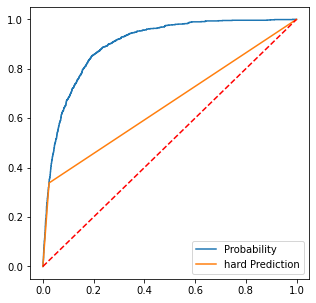

In [71]:
#@ INSPECTING THE ROC CURVE:
plt.figure(figsize=(5,5))
fpr,tpr,_=roc_curve(y_val,y_pred)
plt.plot(fpr,tpr,label='Probability')
fpr,tpr,_=roc_curve(y_val,y_pred_bin)
plt.plot(fpr,tpr,label='hard Prediction')
plt.legend()
plt.plot([0,1],[0,1],color='red',linestyle="--")


In [72]:
#@ CREATING CONFUSION MATRIX:
def confusion_matrix(y_val,y_pred):
    scores=[]
    thresholds=np.linspace(0,1,100)
    for t in thresholds:
        
        actual_positive=(y_val==1)
        actual_negative=(y_val==0)
        predict_positive=(y_val>=t)
        predict_negative=(y_val<t)
        tp=(predict_positive&actual_positive).sum()
        tn=(actual_negative&predict_negative).sum()
        fp=(actual_negative&predict_positive).sum()
        fn=(actual_positive&predict_negative).sum()
        scores.append((t,tp,tn,fp,fn))
    columns=['thresholds','tp','tn','fp','fn']
    df_scores=pd.DataFrame(scores,columns=columns)
    return df_scores

In [73]:
#@ IMPLEMENTATION OF FUNCTION:
df_scores= confusion_matrix(y_val,y_pred)
df_scores[::10]

,thresholds,tp,tn,fp,fn
0,0.000000,1098,0,7944,0
10,0.101010,1098,7944,0,0
20,0.202020,1098,7944,0,0
30,0.303030,1098,7944,0,0
40,0.404040,1098,7944,0,0
50,0.505051,1098,7944,0,0
60,0.606061,1098,7944,0,0
70,0.707071,1098,7944,0,0
80,0.808081,1098,7944,0,0
90,0.909091,1098,7944,0,0


In [74]:
#@ ADDING THE COLUMNS:
df_scores['p']=df_scores.tp/(df_scores.tp+df_scores.fp)
df_scores['r']=df_scores.tp/(df_scores.tp+df_scores.tn)

In [75]:
df_scores

,thresholds,tp,tn,fp,fn,p,r
0,0.000000,1098,0,7944,0,0.121433,1.000000
1,0.010101,1098,7944,0,0,1.000000,0.121433
2,0.020202,1098,7944,0,0,1.000000,0.121433
3,0.030303,1098,7944,0,0,1.000000,0.121433
4,0.040404,1098,7944,0,0,1.000000,0.121433
...,...,...,...,...,...,...,...
95,0.959596,1098,7944,0,0,1.000000,0.121433
96,0.969697,1098,7944,0,0,1.000000,0.121433
97,0.979798,1098,7944,0,0,1.000000,0.121433
98,0.989899,1098,7944,0,0,1.000000,0.121433


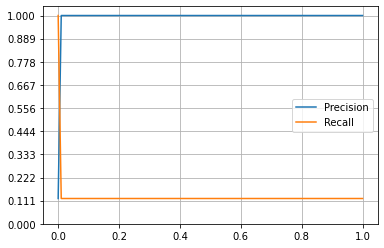

In [76]:
#@ INSPECTING THE CURVES:
plt.plot(df_scores.thresholds,df_scores.p,label='Precision')
plt.plot(df_scores.thresholds,df_scores.r,label='Recall')
plt.yticks(np.linspace(0,1,10))
plt.legend()
plt.grid()

- Answer for Question3:0.665

In [77]:
#@ GETTING F1 SCORES:
df_scores['F1']=2*((df_scores.p*df_scores.r)/(df_scores.p+df_scores.r))
df_scores

,thresholds,tp,tn,fp,fn,p,r,F1
0,0.000000,1098,0,7944,0,0.121433,1.000000,0.216568
1,0.010101,1098,7944,0,0,1.000000,0.121433,0.216568
2,0.020202,1098,7944,0,0,1.000000,0.121433,0.216568
3,0.030303,1098,7944,0,0,1.000000,0.121433,0.216568
4,0.040404,1098,7944,0,0,1.000000,0.121433,0.216568
...,...,...,...,...,...,...,...,...
95,0.959596,1098,7944,0,0,1.000000,0.121433,0.216568
96,0.969697,1098,7944,0,0,1.000000,0.121433,0.216568
97,0.979798,1098,7944,0,0,1.000000,0.121433,0.216568
98,0.989899,1098,7944,0,0,1.000000,0.121433,0.216568


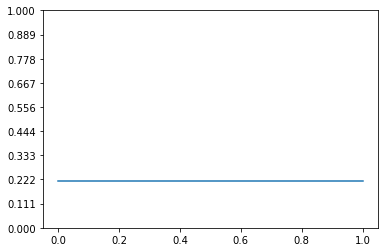

In [78]:
#@ INSPECTING F1 SCORE:
plt.plot(df_scores.thresholds,df_scores.F1)
plt.yticks(np.linspace(0,1,10))
plt.show()

- Answer for Question4:0.22

In [79]:
#@ DEFINING TRAIN AND PREDICT FUNCTION:
def train(df_train,y_train,C=1.0):
    trainc_dict=df_train[cat+num].to_dict(orient='records')
    dv=DictVectorizer(sparse=True)
    X_train=dv.fit_transform(trainc_dict)
    model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train,y_train)
    return dv,model
def predict(df,dv,model):
    val_dict=df[cat+num].to_dict(orient='records')
    X_val=dv.transform(val_dict)
    y_pred=model.predict_proba(X_val)[:,1]
    return y_pred


In [80]:
#@ INITIALIZING KFOLD CROSS VALIDATION:
scores=[]
kfold=KFold(n_splits=5, shuffle=True, random_state=1)
for train_idx,val_idx in kfold.split(df_full_train):
    df_train=df_full_train.iloc[train_idx]
    df_val=df_full_train.iloc[val_idx]
    y_train=df_train.y
    y_val=df_val.y
    dv,model= train(df_train,y_train,C=1.0)
    y_pred= predict(df_val,dv,model)
    auc=roc_auc_score(y_val,y_pred)
    scores.append(auc)
print(f'{np.mean(scores):.3f}+-{np.std(scores):.4f}')

0.906+-0.0053


- Answer for Question5:0.0001


In [85]:
#@ INSPECTING KFOLD CROSS VALIDATION:
kfold=KFold(n_splits=5, shuffle=True, random_state=1)
for C in [0.000001, 0.001, 1]:
    scores=[]
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]
        y_train=df_train.y
        y_val=df_val.y
        dv,model=train(df_train,y_train,C=C)
        y_pred= predict(df_val,dv,model)
        auc=roc_auc_score(y_val,y_pred)
        scores.append(auc)
print(f'{C:}Mean AUC={np.mean(scores)}+-{np.std(scores)}')        

1Mean AUC=0.9055381261484007+-0.0053151357572693


- Answer for Question6: 1